In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
df_gpx = pd.read_csv(
    "tabela_final_lsmision_35km_ultima.csv", sep=";", index_col="Unnamed: 0"
)
df_gpx.head()

,latitude,longitude,elevacao,diff_elev,distancias,soma_elev,soma_dist,km_group,desnivel_positivo,desnivel_negativo
0,"-22,3905289","-44,9661817","922,0","0,0","0,0","0,0","0,0",0,"0,0","0,0"
1,"-22,3905414","-44,9661728","922,0","0,0","1,66","0,0","1,66",1,"0,0","0,0"
2,"-22,3905539","-44,9661641","922,0","0,0","1,65","0,0","3,3099999999999996",1,"0,0","0,0"
3,"-22,3905742","-44,9661552","921,0","-1,0","2,44","-1,0","5,75",1,"0,0","-1,0"
4,"-22,3905946","-44,9661465","921,0","0,0","2,44","-1,0","8,19",1,"0,0","0,0"


In [16]:
# Converter colunas de números com vírgula para ponto e tipo float
cols_to_convert = [
    "latitude",
    "longitude",
    "elevacao",
    "diff_elev",
    "distancias",
    "soma_elev",
    "soma_dist",
    "desnivel_positivo",
    "desnivel_negativo",
]
for col in cols_to_convert:
    df_gpx[col] = df_gpx[col].str.replace(",", ".", regex=False).astype(float)
df_gpx.head()

,latitude,longitude,elevacao,diff_elev,distancias,soma_elev,soma_dist,km_group,desnivel_positivo,desnivel_negativo
0,-22.390529,-44.966182,922.0,0.0,0.00,0.0,0.00,0,0.0,0.0
1,-22.390541,-44.966173,922.0,0.0,1.66,0.0,1.66,1,0.0,0.0
2,-22.390554,-44.966164,922.0,0.0,1.65,0.0,3.31,1,0.0,0.0
3,-22.390574,-44.966155,921.0,-1.0,2.44,-1.0,5.75,1,0.0,-1.0
4,-22.390595,-44.966147,921.0,0.0,2.44,-1.0,8.19,1,0.0,0.0


In [17]:
len(df_gpx)

18805

In [20]:
df_gpx.distancias.sum()

np.float64(36011.71)

In [21]:
df_gpx.km_group.unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37])

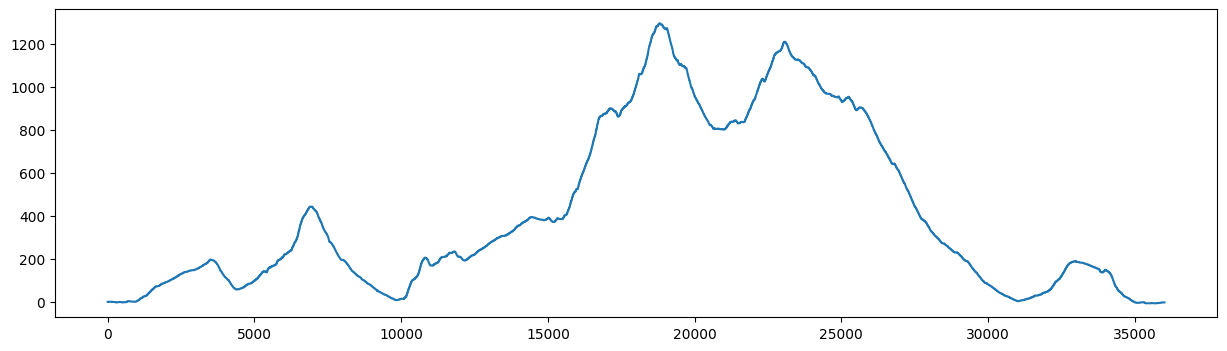

In [ ]:
plt.figure(figsize=(15, 4))
plt.plot(df_gpx["soma_dist"], df_gpx["soma_elev"])

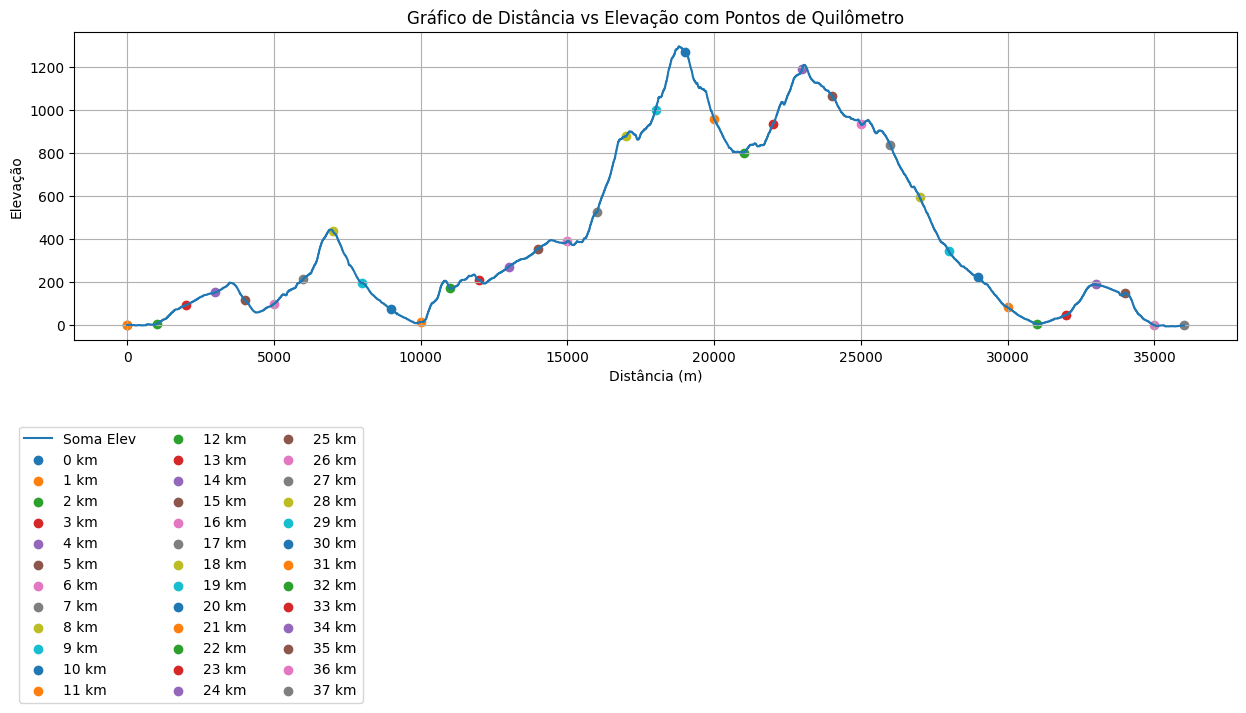

In [ ]:
plt.figure(figsize=(15, 4))
plt.plot(df_gpx["soma_dist"], df_gpx["soma_elev"], label="Soma Elev")

# Adicionando os pontos para cada quilômetro
km_points = df_gpx[
    df_gpx["km_group"].notnull()
]  # Filtra apenas as linhas que têm 'km_group'
for km in km_points["km_group"].unique():
    km_dist = km_points[km_points["km_group"] == km]["soma_dist"].values[0]
    km_elev = km_points[km_points["km_group"] == km]["soma_elev"].values[0]
    plt.scatter(km_dist, km_elev, label=f"{km} km")

# Adicionando legendas e título
plt.xlabel("Distância (m)")
plt.ylabel("Elevação")
plt.title("Gráfico de Distância vs Elevação com Pontos de Quilômetro")
plt.legend(
    loc="lower center", bbox_to_anchor=(0.1, -1.2), ncol=3
)  # Ajusta a posição da legenda
plt.grid(True)

# Exibindo o gráfico
plt.show()

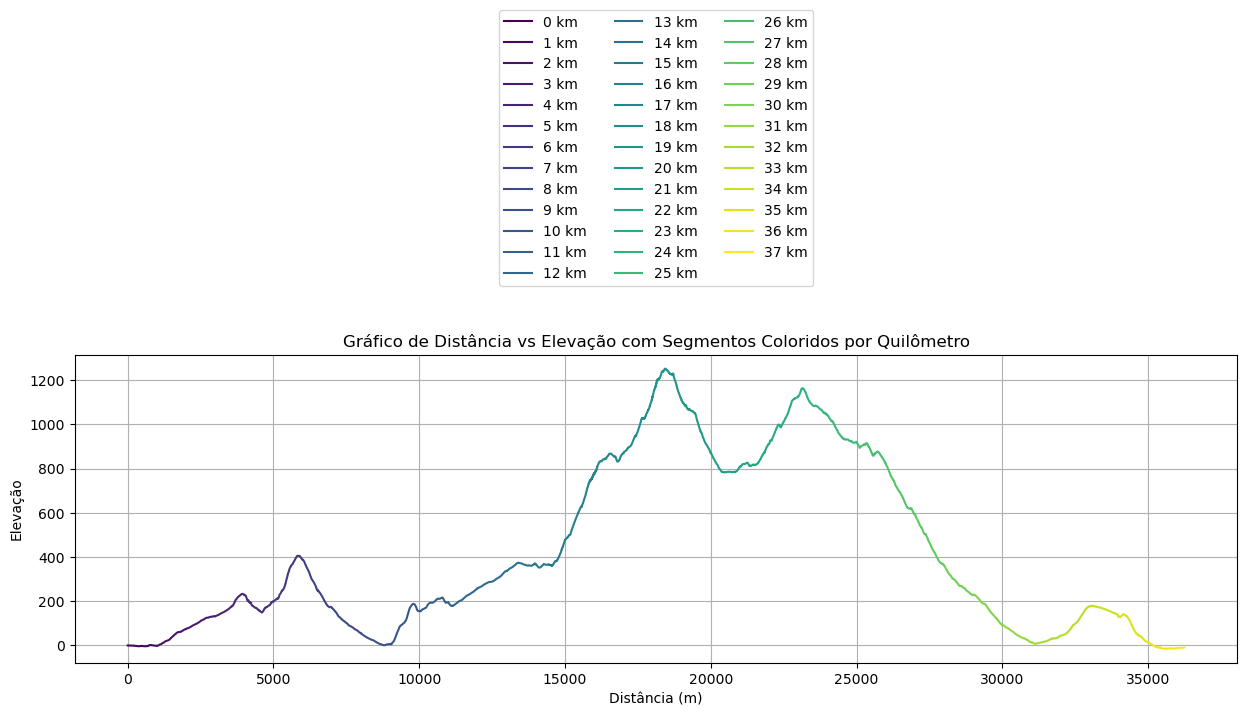

In [ ]:
# Ordena os dados pela distância para garantir que os segmentos sejam contínuos
df_final_sorted = df_gpx.sort_values(by="soma_dist")

# Plotando o gráfico
plt.figure(figsize=(15, 4))

# Obtendo os grupos únicos de quilômetro
km_groups = df_final_sorted["km_group"].unique()

# Definindo um colormap para os grupos
cmap = plt.get_cmap("viridis", len(km_groups))

# Plotando cada segmento com uma cor diferente
for i, km in enumerate(km_groups):
    # Seleciona os dados para o grupo atual
    segment = df_final_sorted[df_final_sorted["km_group"] == km]

    # Plota o segmento
    plt.plot(
        segment["soma_dist"], segment["soma_elev"], color=cmap(i), label=f"{km} km"
    )

# Adicionando legendas e título
plt.xlabel("Distância (m)")
plt.ylabel("Elevação")
plt.title("Gráfico de Distância vs Elevação com Segmentos Coloridos por Quilômetro")
plt.legend(
    loc="lower center", bbox_to_anchor=(0.5, 1.2), ncol=3
)  # Ajusta a posição da legenda
plt.grid(True)

# Exibindo o gráfico
plt.show()


In [ ]:
df_gpx80 = pd.read_csv(
    "tabela_final_lsmision_80km.csv", sep=";", index_col="Unnamed: 0"
)

In [17]:
df_gpx80.head()

,latitude,longitude,elevacao,ordem,diff_elev,distancias,soma_elev,soma_dist,km_group,desnivel_positivo,desnivel_negativo,2km_group,5km_group,classe_2km,classe_5km
1,-22.390419,-44.966804,925.0,1,0.0,1.29,0.0,1.29,1,0.0,0.0,1,1,de 0 até 2km,de 0 até 5km
2,-22.390429,-44.966800,925.0,2,0.0,1.19,0.0,2.48,1,0.0,0.0,1,1,de 0 até 2km,de 0 até 5km
3,-22.390439,-44.966796,925.0,3,0.0,1.19,0.0,3.67,1,0.0,0.0,1,1,de 0 até 2km,de 0 até 5km
4,-22.390449,-44.966792,924.9,4,-0.1,1.19,-0.1,4.86,1,0.0,-0.1,1,1,de 0 até 2km,de 0 até 5km
5,-22.390459,-44.966788,924.9,5,0.0,1.19,-0.1,6.05,1,0.0,0.0,1,1,de 0 até 2km,de 0 até 5km


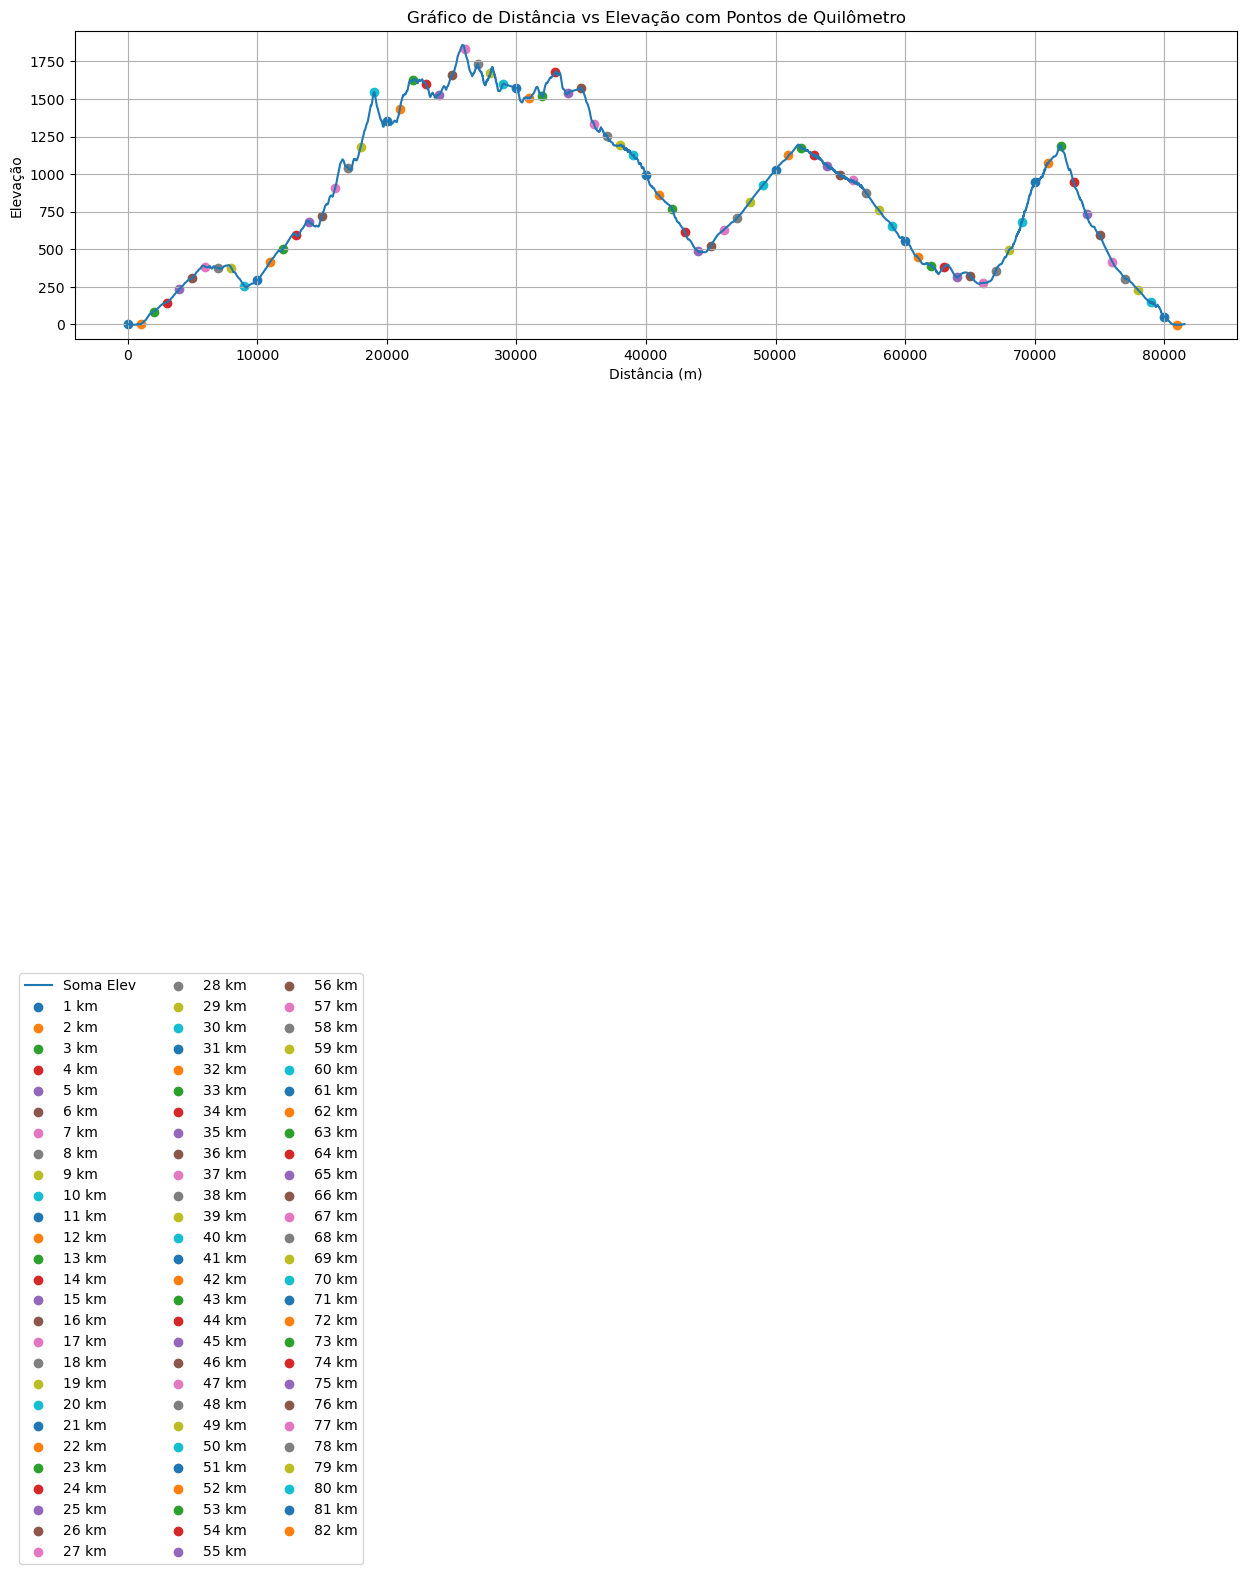

In [ ]:
plt.figure(figsize=(15, 4))
plt.plot(df_gpx80["soma_dist"], df_gpx80["soma_elev"], label="Soma Elev")

# Adicionando os pontos para cada quilômetro
km_points = df_gpx80[
    df_gpx80["km_group"].notnull()
]  # Filtra apenas as linhas que têm 'km_group'
for km in km_points["km_group"].unique():
    km_dist = km_points[km_points["km_group"] == km]["soma_dist"].values[0]
    km_elev = km_points[km_points["km_group"] == km]["soma_elev"].values[0]
    plt.scatter(km_dist, km_elev, label=f"{km} km")

# Adicionando legendas e título
plt.xlabel("Distância (m)")
plt.ylabel("Elevação")
plt.title("Gráfico de Distância vs Elevação com Pontos de Quilômetro")
plt.legend(
    loc="lower center", bbox_to_anchor=(0.1, -4), ncol=3
)  # Ajusta a posição da legenda
plt.grid(True)

# Exibindo o gráfico
plt.show()

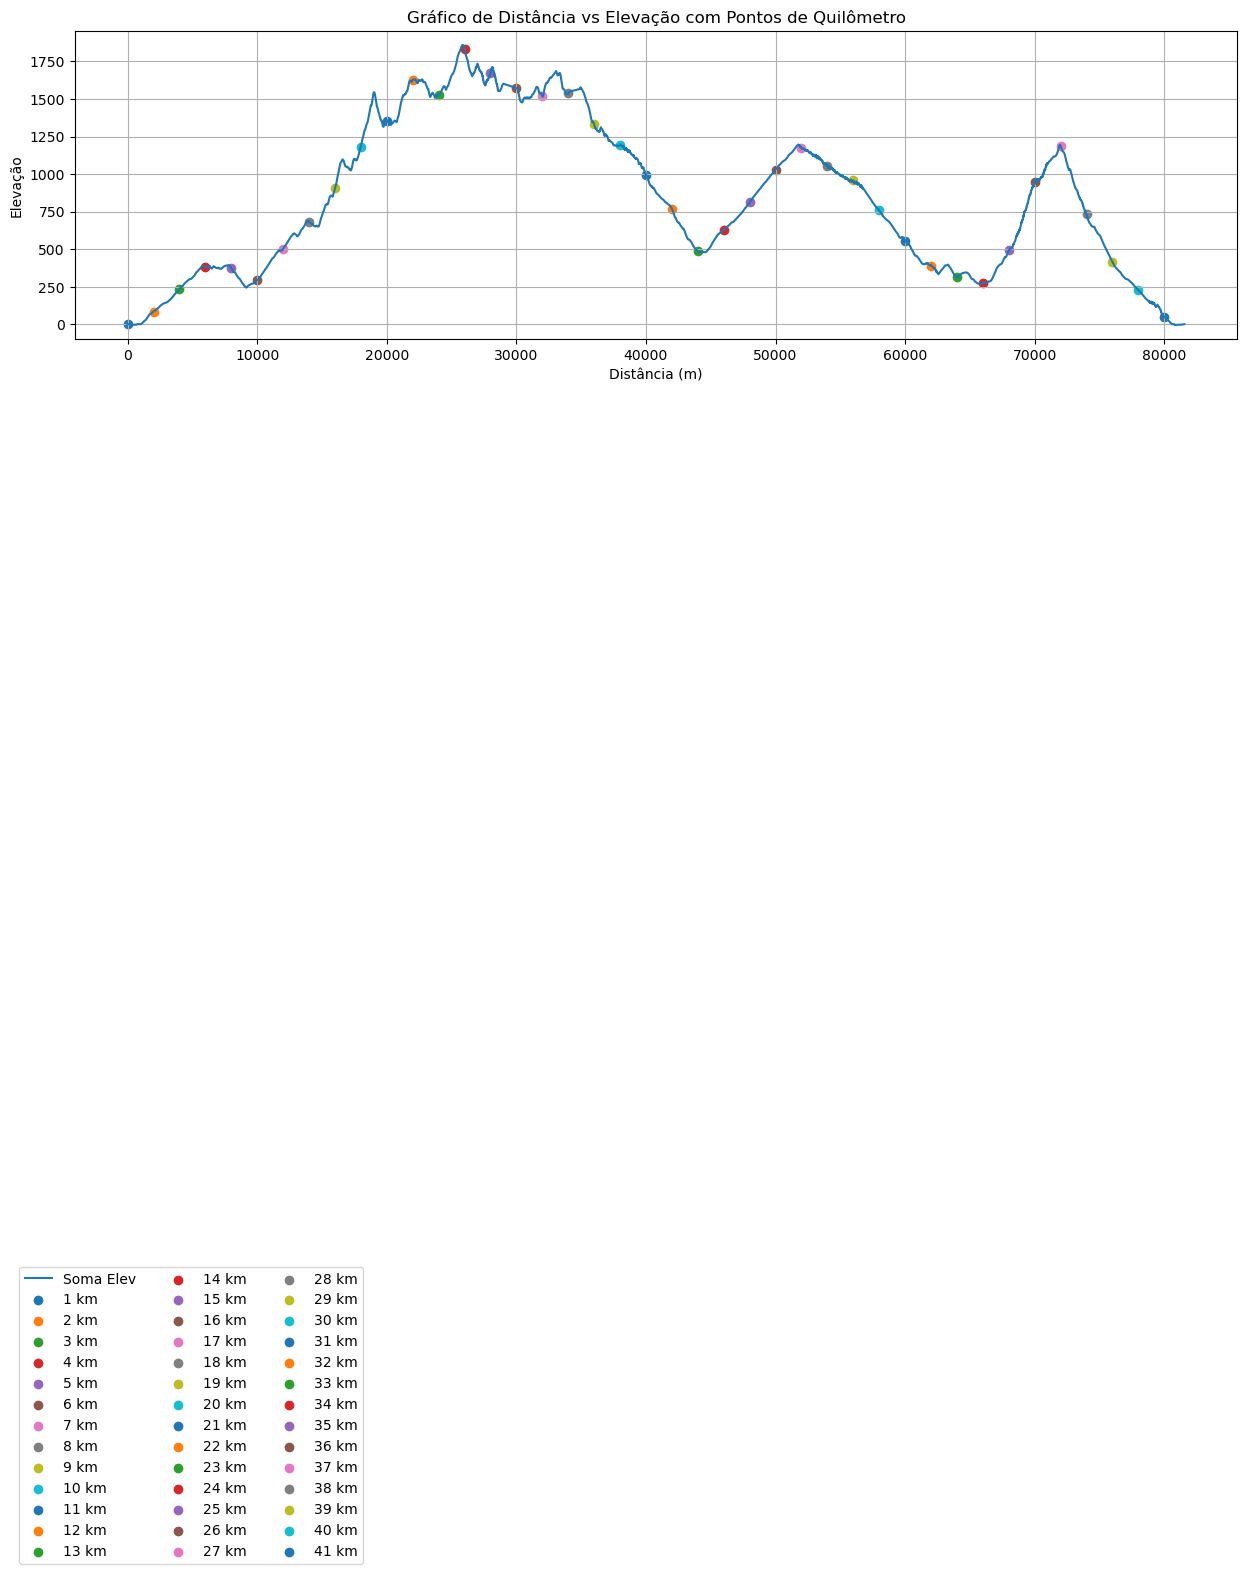

In [ ]:
plt.figure(figsize=(15, 4))
plt.plot(df_gpx80["soma_dist"], df_gpx80["soma_elev"], label="Soma Elev")

# Adicionando os pontos para cada quilômetro
km_points = df_gpx80[
    df_gpx80["2km_group"].notnull()
]  # Filtra apenas as linhas que têm 'km_group'
for km in km_points["2km_group"].unique():
    km_dist = km_points[km_points["2km_group"] == km]["soma_dist"].values[0]
    km_elev = km_points[km_points["2km_group"] == km]["soma_elev"].values[0]
    plt.scatter(km_dist, km_elev, label=f"{km} km")

# Adicionando legendas e título
plt.xlabel("Distância (m)")
plt.ylabel("Elevação")
plt.title("Gráfico de Distância vs Elevação com Pontos de Quilômetro")
plt.legend(
    loc="lower center", bbox_to_anchor=(0.1, -4), ncol=3
)  # Ajusta a posição da legenda
plt.grid(True)

# Exibindo o gráfico
plt.show()